In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway
import pingouin as pg
%matplotlib inline

In [2]:
df=pd.read_excel('Hypothesi 1.xlsx')
df=df.dropna(axis=0)
df=df.set_index("Binomial")
df['maximum SVL'] = pd.to_numeric(df['maximum SVL'], errors='coerce')
df = df.dropna(subset=['maximum SVL'])
df

,main biogeographic Realm,maximum SVL,Leg development
Binomial,,,
Ablepharus bivittatus,Palearctic,61.0,four-legged
Ablepharus budaki,Palearctic,48.0,four-legged
Ablepharus chernovi,Palearctic,54.0,four-legged
Ablepharus darvazi,Palearctic,44.0,four-legged
Ablepharus deserti,Palearctic,58.8,four-legged
...,...,...,...
Zygaspis maraisi,Afrotropic,207.0,Limbless
Zygaspis nigra,Afrotropic,280.0,Limbless
Zygaspis quadrifrons,Afrotropic,245.0,Limbless


#### Removing the outliers for the ANOVA test

<Axes: xlabel='maximum SVL', ylabel='Count'>

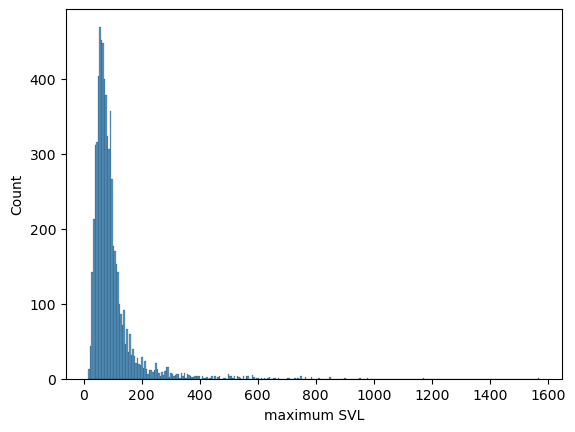

In [4]:
sns.histplot(data=df,x=df['maximum SVL'])

In [5]:
outliers=[]
def detect_outliers(data):
    threshold=2
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [6]:
outliers=detect_outliers(df['maximum SVL'])
outliers

[260.0,
 295.0,
 500.0,
 382.0,
 560.0,
 810.0,
 345.0,
 273.0,
 285.0,
 260.0,
 290.0,
 307.0,
 569.0,
 317.0,
 291.0,
 535.0,
 269.0,
 269.0,
 316.0,
 550.0,
 360.0,
 276.0,
 284.0,
 500.0,
 280.0,
 310.0,
 268.0,
 305.0,
 364.0,
 278.0,
 410.0,
 262.0,
 283.0,
 462.0,
 268.0,
 375.0,
 320.0,
 265.0,
 350.0,
 325.0,
 328.0,
 375.0,
 286.0,
 290.0,
 291.0,
 391.0,
 260.0,
 280.0,
 325.0,
 300.0,
 285.0,
 283.0,
 340.0,
 285.0,
 350.0,
 290.0,
 290.0,
 470.0,
 500.0,
 530.0,
 350.0,
 320.0,
 450.0,
 315.0,
 304.0,
 400.0,
 322.0,
 285.0,
 315.0,
 310.0,
 397.0,
 490.0,
 510.0,
 428.0,
 640.0,
 655.0,
 550.0,
 750.0,
 560.0,
 485.0,
 395.0,
 533.0,
 290.0,
 362.0,
 420.0,
 705.0,
 520.0,
 260.0,
 560.0,
 280.0,
 350.0,
 285.0,
 286.0,
 412.0,
 450.0,
 300.0,
 263.0,
 340.0,
 299.0,
 265.0,
 444.0,
 502.0,
 370.0,
 520.0,
 362.0,
 370.0,
 350.0,
 280.0,
 330.0,
 434.0,
 580.0,
 289.0,
 340.0,
 294.0,
 385.0,
 635.0,
 356.0,
 440.0,
 550.0,
 358.0,
 336.0,
 470.1,
 500.0,
 426.6,
 300.0,


In [7]:
df_clean = df[~df['maximum SVL'].isin(outliers)]
df_clean

,main biogeographic Realm,maximum SVL,Leg development
Binomial,,,
Ablepharus bivittatus,Palearctic,61.0,four-legged
Ablepharus budaki,Palearctic,48.0,four-legged
Ablepharus chernovi,Palearctic,54.0,four-legged
Ablepharus darvazi,Palearctic,44.0,four-legged
Ablepharus deserti,Palearctic,58.8,four-legged
...,...,...,...
Zygaspis kafuensis,Afrotropic,220.0,Limbless
Zygaspis maraisi,Afrotropic,207.0,Limbless
Zygaspis quadrifrons,Afrotropic,245.0,Limbless


#### Right-skewed to normal distribution by making SVL to SVL log column

In [9]:
df_clean = df_clean[df_clean['maximum SVL'] > 0].copy()
df_clean.loc[:, 'SVL_log'] = np.log(df_clean['maximum SVL'])

In [10]:
df_clean

,main biogeographic Realm,maximum SVL,Leg development,SVL_log
Binomial,,,,
Ablepharus bivittatus,Palearctic,61.0,four-legged,4.110874
Ablepharus budaki,Palearctic,48.0,four-legged,3.871201
Ablepharus chernovi,Palearctic,54.0,four-legged,3.988984
Ablepharus darvazi,Palearctic,44.0,four-legged,3.784190
Ablepharus deserti,Palearctic,58.8,four-legged,4.074142
...,...,...,...,...
Zygaspis kafuensis,Afrotropic,220.0,Limbless,5.393628
Zygaspis maraisi,Afrotropic,207.0,Limbless,5.332719
Zygaspis quadrifrons,Afrotropic,245.0,Limbless,5.501258


<Axes: xlabel='SVL_log', ylabel='Count'>

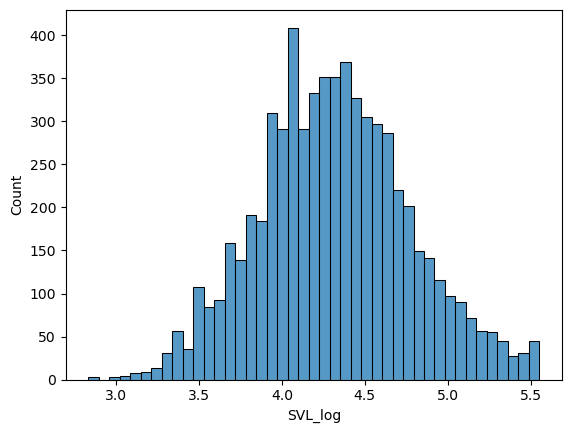

In [11]:
sns.histplot(data=df_clean,x=df_clean['SVL_log'])

# Performing ANOVA test

In [13]:
realms = df_clean['main biogeographic Realm'].dropna().unique()
print("Unique Realms:", realms)

Unique Realms: ['Palearctic' 'Oriental' 'Neotropic' 'Nearctic' 'Afrotropic' 'Madagascar'
 'Australia' 'Oceania']


In [14]:
leg_dev=df_clean['Leg development'].dropna().unique()
print("Types_of_Leg_developments:", leg_dev)

Types_of_Leg_developments: ['four-legged' 'Limbless' 'forelimbs only' 'leg-reduced' 'hindlimbs only']


### Check for the Homogenity of varience

In [16]:
groups_realm = [df_clean[df_clean['main biogeographic Realm'] == r]['SVL_log']
                for r in realms]
stat, p = levene(*groups_realm)
print(f"Levene’s test (Realm only): F = {stat:.4f}, p = {p:.4f}")
print("It means that we have unequal group sizes or heteroscedasticity (different spreads).")

Levene’s test (Realm only): F = 7.9119, p = 0.0000
It means that we have unequal group sizes or heteroscedasticity (different spreads).


## One way Welch ANOVA test

In [18]:
welch_oneway_anova = pg.welch_anova(dv='SVL_log', between='main biogeographic Realm', data=df_clean)
welch_oneway_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,main biogeographic Realm,7,1635.89287,12.571409,8.801912e-16,0.010194


In [59]:
posthoc=pg.pairwise_gameshowell(dv='SVL_log',
                        between='main biogeographic Realm',
                        data=df_clean)
significant_pairs = posthoc[posthoc['pval'] < 0.05]
significant_pairs

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
2,Afrotropic,Nearctic,4.348399,4.533807,-0.185408,0.029782,-6.225567,401.187705,3.379666e-08,-0.395295
8,Australia,Nearctic,4.284961,4.533807,-0.248846,0.029771,-8.358752,396.985653,0.000000e+00,-0.596209
13,Madagascar,Nearctic,4.259905,4.533807,-0.273902,0.038897,-7.041700,542.456852,1.613824e-10,-0.572469
18,Nearctic,Neotropic,4.533807,4.311250,0.222556,0.027369,8.131701,294.727243,3.134160e-13,0.492582
19,Nearctic,Oceania,4.533807,4.298054,0.235753,0.032253,7.309461,489.748792,3.087186e-11,0.546284
20,Nearctic,Oriental,4.533807,4.299880,0.233926,0.028353,8.250360,336.386464,0.000000e+00,0.553476
21,Nearctic,Palearctic,4.533807,4.323761,0.210045,0.031554,6.656599,464.892501,2.213290e-09,0.499463


### Two way ANOVA since large size is robust to the levene's test

In [21]:
anova_result = pg.anova(dv='SVL_log',
                        between=['main biogeographic Realm', 'Leg development'],
                        data=df_clea
                        n,
                        detailed=True)
anova_result

,Source,SS,DF,MS,F,p-unc,np2
0,main biogeographic Realm,23.968919,7.0,3.424131,18.566887,1.170746e-24,0.020054
1,Leg development,1050.199558,4.0,262.549889,1423.641146,0.000000e+00,0.472752
2,main biogeographic Realm * Leg development,151.193646,28.0,5.399773,29.279537,1.192989e-144,0.114328
3,Residual,1171.260295,6351.0,0.184421,NaN,NaN,NaN


In [22]:
df_clean['Leg development'].value_counts()

Leg development
four-legged       5830
Limbless           301
leg-reduced        185
hindlimbs only      62
forelimbs only      10
Name: count, dtype: int64

In [23]:
df_clean.groupby(['main biogeographic Realm', 'Leg development']).size()

main biogeographic Realm  Leg development
Afrotropic                Limbless             89
                          four-legged         829
                          hindlimbs only       19
                          leg-reduced          27
Australia                 Limbless             55
                          forelimbs only        1
                          four-legged         593
                          hindlimbs only       33
                          leg-reduced          66
Madagascar                Limbless             21
                          forelimbs only        2
                          four-legged         294
                          hindlimbs only        3
                          leg-reduced           9
Nearctic                  Limbless              8
                          forelimbs only        1
                          four-legged         207
                          leg-reduced           1
Neotropic                 Limbless             71
        

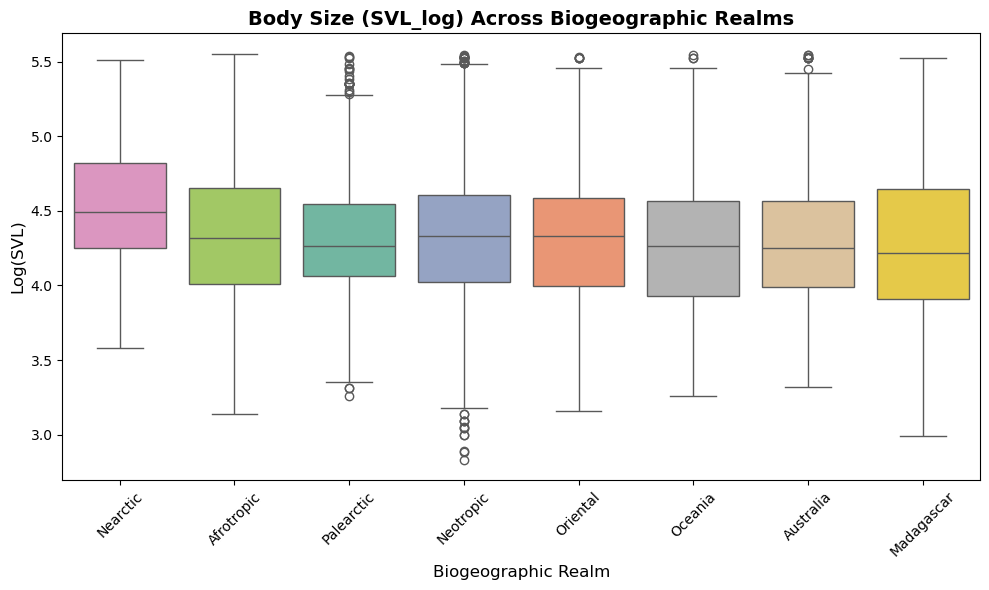

In [80]:
realm_order = (
    df_clean.groupby('main biogeographic Realm')['SVL_log']
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='main biogeographic Realm',
    y='SVL_log',
    hue='main biogeographic Realm',
    order=realm_order,
    palette='Set2'
)
plt.title('Body Size (SVL_log) Across Biogeographic Realms', fontsize=14, fontweight='bold')
plt.xlabel('Biogeographic Realm', fontsize=12)
plt.ylabel('Log(SVL)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('body_size_by_realm.png', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
df_clean['Realm_Group'] = df_clean['main biogeographic Realm'].apply(
    lambda x: 'Nearctic (Small)' if x == 'Nearctic'
    else 'Other Realms (Large)'
)

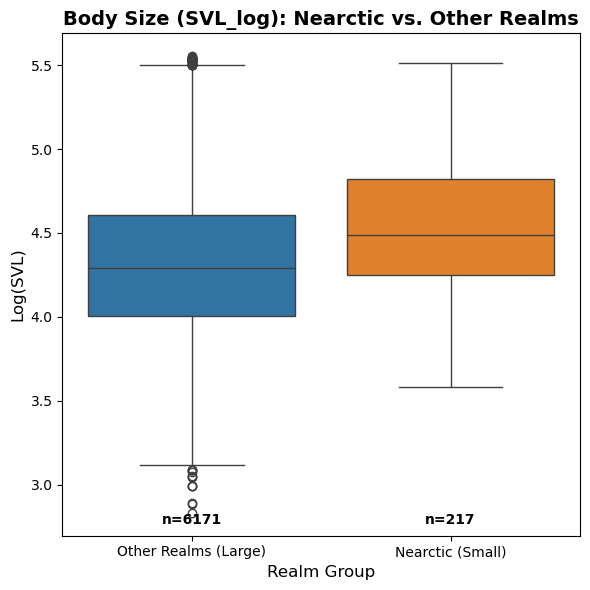

In [90]:
plt.figure(figsize=(6, 6))
sns.boxplot(
    data=df_clean,
    x='Realm_Group',
    y='SVL_log',
    hue='Realm_Group', 
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Body Size (SVL_log): Nearctic vs. Other Realms', fontsize=14, fontweight='bold')
plt.xlabel('Realm Group', fontsize=12)
plt.ylabel('Log(SVL)', fontsize=12)

# Add sample sizes below each box
groups_sorted = ['Other Realms (Large)', 'Nearctic (Small)']
for i, group in enumerate(groups_sorted):
    n = len(df_clean[df_clean['Realm_Group'] == group])
    y_min = plt.gca().get_ylim()[0]
    plt.text(i, y_min + 0.05, f'n={n}', ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.tight_layout()
plt.savefig('body_size_nearctic_vs_others.png', dpi=300, bbox_inches='tight')
plt.show()